# SMS Spam classifier
In this notebook, I will be building a SMS spam classifier. The dataset used in this notebook is the SMS Spam Collection dataset from the UCI Machine Learning Repository. The dataset contains 5572 SMS messages that are labeled as either spam or ham (not spam). The goal of this notebook is to build a model that can accurately classify SMS messages as spam or ham.
This will be divided into followign steps:
- Data Cleaning
- EDA
- Text Preprocessing
- Trying different models
- Deciding final model
- Make pipeline
- Evaluate pipeline
- Export pipeline


## Step 0 : Importing the libraries and dataset

In [ ]:
!pip install -r requirements.txt

In [90]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin1')
print(df.sample(10))
print("\n\n\n\n\n")
print(df.shape)

       v1                                                 v2 Unnamed: 2  \
4452  ham                         Or I guess  &lt;#&gt;  min        NaN   
4893  ham                           Convey my regards to him        NaN   
1670  ham                                        Lmao!nice 1        NaN   
1482  ham                                              Ok...        NaN   
66    ham  Today is \song dedicated day..\" Which song wi...        NaN   
2542  ham                       Aiyo please Ì_ got time meh.        NaN   
459   ham  Going thru a very different feeling.wavering d...        NaN   
2324  ham                                            Ok lor.        NaN   
3875  ham                             did u get that message        NaN   
895   ham  Superb Thought- \Be grateful that u dont have ...        NaN   

     Unnamed: 3 Unnamed: 4  
4452        NaN        NaN  
4893        NaN        NaN  
1670        NaN        NaN  
1482        NaN        NaN  
66          NaN        NaN  


## Step 1 : Data Cleaning

### Getting overview of the dataset

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Dropping almost empty columns

In [92]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### encoding the label

In [93]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.sample(10)

,label,text
4757,1,URGENT! Your Mobile number has been awarded wi...
1165,0,"Haha yeah I see that now, be there in a sec"
4368,0,Anytime lor...
4094,0,I ain't answerin no phone at what is actually ...
367,1,Here is your discount code RP176781. To stop f...
4580,0,Not course. Only maths one day one chapter wit...
4217,0,Actually i'm waiting for 2 weeks when they sta...
1805,0,God bless.get good sleep my dear...i will pray!
2821,1,ROMCAPspam Everyone around should be respondin...
4745,0,Orh i tot u say she now still dun believe.


### Removing duplicates

In [94]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

403
0


## Step 2 : EDA

### Visualizing the distribution of the target variable

In [95]:
df.label.value_counts()

label
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

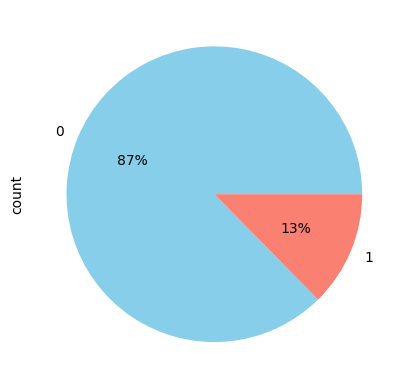

In [96]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'salmon'])


according to above pie chart our data has more number of ham messages than spam messages we should keep this in mind since this can make our model biased towards ham messages.

### Making some new columns to analyze the data
- Length of the message
- Number of words in the message
- Number of Sentence in the message

In [97]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
df['num_characters']=df.text.apply(len)
df.sample(5)

,label,text,num_characters
2168,0,Thx. All will be well in a few months,37
2626,0,Unni thank you dear for the recharge..Rakhesh,45
673,0,Ditto. And you won't have to worry about me sa...,153
2981,0,"Tonight? Yeah, I'd be down for that",35
3696,1,You are a winner you have been specially selec...,159


In [99]:
df['text']=df['text'].apply(lambda x: nltk.word_tokenize(x))
df.head(5)

,label,text,num_characters
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61


In [100]:
df['num_words'] = df.text.apply(lambda x: len(x))
df.head(5)

,label,text,num_characters,num_words
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15


In [101]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(' '.join(x))))
df.head(5)

,label,text,num_characters,num_words,num_sentences
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24,2
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8,2
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37,2
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13,1
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15,1


In [102]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,2.015670
std,58.236293,13.324758,1.521119
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

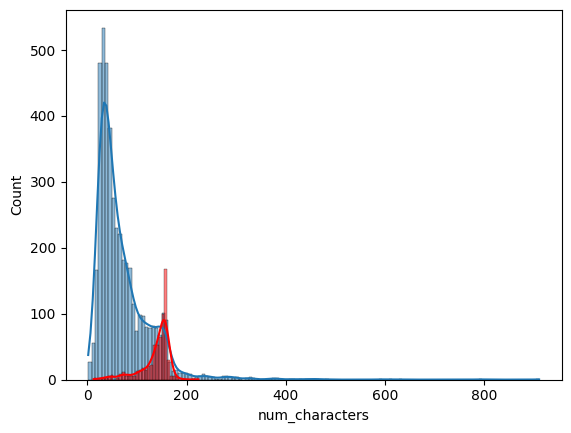

In [103]:
import seaborn as sns

sns.histplot(df[df.label==0]['num_characters'], kde=True)
sns.histplot(df[df.label==1]['num_characters'], kde=True,color='red')

<Axes: xlabel='num_words', ylabel='Count'>

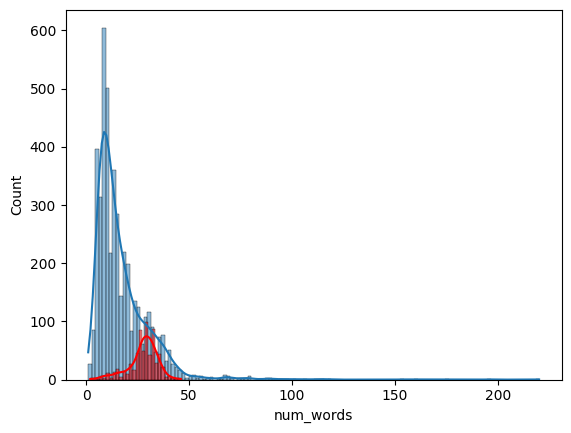

In [104]:
sns.histplot(df[df.label==0]['num_words'], kde=True)
sns.histplot(df[df.label==1]['num_words'], kde=True,color='red')

From the above graph we can clearly see that the spam messages are longer than ham messages.

### Checking co-relation between the new columns

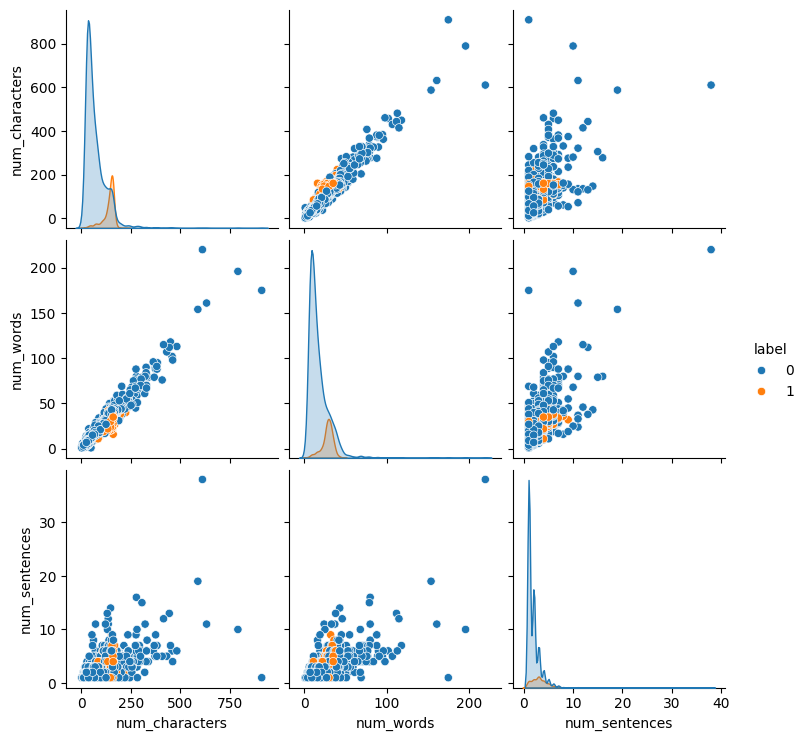

In [105]:
# checking relation between columns
sns.pairplot(df, hue='label')

<Axes: >

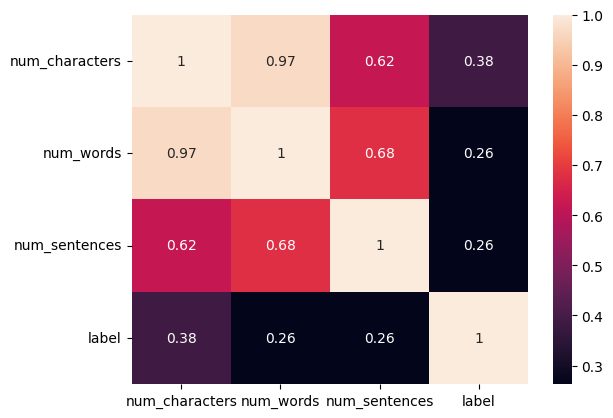

In [106]:
numeric_df = df[['num_characters', 'num_words', 'num_sentences', 'label']]
sns.heatmap(numeric_df.corr(), annot=True)


## Step 3 : Text Preprocessing
- Converting to lower case
- Tokenization
- Removing special characters
- Removing stopwords
- stemming

In [107]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    ps=PorterStemmer()
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[word for word in text if word.isalnum()]
    stop_words=set(stopwords.words('english'))
    text=[ps.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

print(transform_text('Hello! How are you? dancing %%%'))

hello danc


In [108]:
df['transformed_text']=df.text.apply(lambda x: transform_text(' '.join(x)))
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8,2,ok lar joke wif u oni
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13,1,u dun say earli hor u c alreadi say
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15,1,nah think goe usf live around though


### Applying some more EDA on processed text

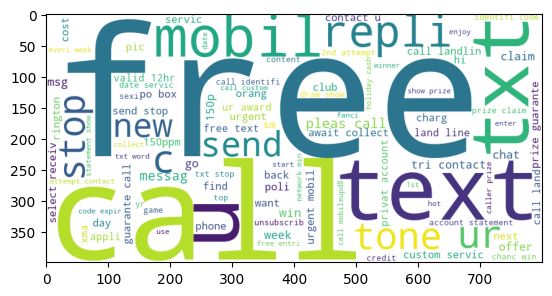

In [109]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=400, min_font_size=10, max_words=100,background_color='white')
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

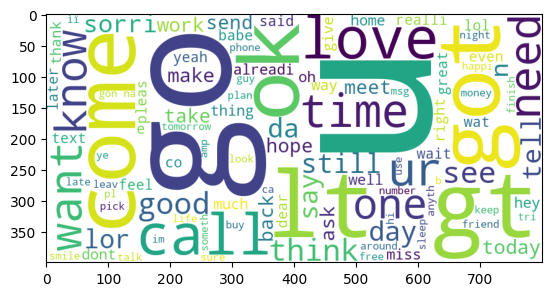

In [110]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

## Step 4 : Try differnet models
here we will try following models:
- MultinomialNB
- BernoulliNB
- GaussianNB

### using count vectorizer

In [111]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

In [112]:
X.shape

(5169, 6750)

In [113]:
y=df['label'].values
y.shape

(5169,)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [116]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8771760154738878
[[774 111]
 [ 16 133]]
0.5450819672131147


In [117]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[870  15]
 [ 14 135]]
0.9


In [118]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9661508704061895
[[882   3]
 [ 32 117]]
0.975


### using tfidf vectorizer

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [120]:
y=df['label'].values
y.shape

(5169,)

In [121]:
print(X.shape)
print(y.shape)

(5169, 6750)
(5169,)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [124]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[774 111]
 [ 21 128]]
0.5355648535564853


In [125]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9468085106382979
[[885   0]
 [ 55  94]]
1.0


In [126]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9661508704061895
[[882   3]
 [ 32 117]]
0.975


After seeing the results of both the models, we can see that the tfidf vectorizer model is performing better than the count vectorizer model. So, we will use the tfidf vectorizer model for our final model along with multinomial naive bayes classifier as our final model.

## Step 5 : Making final model 
Now we will make the final model using the tfidf vectorizer and multinomial naive bayes classifier with a little bit of hyperparameter tuning.

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y=df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)

mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


Here after reducing the number of columns we can see that the accuracy of the model has increased.

## Step 6 : Making pipeline

In [128]:
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure you have downloaded the required resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Custom function to preprocess the text (stemming, stopword removal, etc.)
def transform_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]  # Keep alphanumeric words
    stop_words = set(stopwords.words('english'))
    text = [ps.stem(word) for word in text if word not in stop_words]  # Stemming and stopword removal
    return " ".join(text)

# Custom transformer class for text preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, custom_func):
        self.custom_func = custom_func
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply the custom text transformation function to each element in X
        return [self.custom_func(text) for text in X]

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(transform_text)),  # Custom preprocessing step
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('classifier', MultinomialNB())  # Multinomial Naive Bayes for classification
])

# Getting the data
df=pd.read_csv('spam.csv', encoding='latin1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# train test split
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



# Train the pipeline with the example data
pipeline.fit(X_train, y_train)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline(steps=[('preprocessor',
                 TextPreprocessor(custom_func=<function transform_text at 0x00000194B47665C0>)),
                ('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

## Step 7:  Evaluating pipeline

In [129]:
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.9551569506726457
[[957   0]
 [ 50 108]]
1.0


## Step 8: Exporting models

In [130]:
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

# Using the model

In [131]:
import pickle
pipeline = pickle.load(open('model.pkl', 'rb'))

# Test the model with a custom message
message = input("Enter a message: ")
prediction=int(pipeline.predict([message])[0])
if prediction == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam
